# Python ML: Linear Regression

---

This notebook demonstrates linear regression using the `scikit-learn` package. First, let us import the packages we are going to use:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

The data we will be using during this exercise was obtained from:
https://github.com/pastas/pastas

Let's import the data and take a look:

In [2]:
# Import and inspect the data
dataset = pd.read_csv(r'data\MachineLearning\head_nb1.csv')
dataset.head()

,date,head
0,1985-11-14,27.61
1,1985-11-28,27.73
2,1985-12-14,27.91
3,1985-12-28,28.13
4,1986-01-13,28.32


In [3]:
# We can obtain some information regarding the data by using the info function for dataframes.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    644 non-null    object 
 1   head    644 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [4]:
# We noticed that our date field is read in as an object.
# We can modify this column to be a date by using the to_datetime function in pandas.
dataset['date'] = pd.to_datetime(dataset['date'])
# And check again to see that it is now correct
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    644 non-null    datetime64[ns]
 1   head    644 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.2 KB


In [5]:
# Pandas can describe the dataframe fields for us in terms of some simple statistics.
dataset.describe()

,date,head
count,644,644.000000
mean,2000-09-14 01:13:47.329192704,27.900078
min,1985-11-14 00:00:00,26.710000
25%,1993-01-24 12:00:00,27.557500
50%,2000-05-06 00:00:00,27.920000
75%,2008-07-17 12:00:00,28.230000
max,2015-06-28 00:00:00,28.960000
std,NaN,0.430154


Now that our dataset is ready, let's see what the starting and ending time of our data is:

In [6]:
start_time = dataset['date'].min()
end_time =  dataset['date'].max()
print(f"Head data starts at {start_time} and ends {end_time}")

Head data starts at 1985-11-14 00:00:00 and ends 2015-06-28 00:00:00


When we do linear regression, it is better to use time steps rather than the date-time format that is in our dataset. This is for multiple reasons:

- Firstly, the linearity assumption requires numerical inputs, and thus linear regression models work best with continuous numerical variables. Date-time values are not inherently numeric — they’re complex strings or objects containing years, months, hours, etc. Mapping time to a numeric axis (like t = 0, 1, 2, …) ensures the model can interpret it as a proper quantitative predictor.

- And then it also allows for smoother Feature Engineering (the act of adding additional parameters that can assist the model in fitting the data). Once you have time steps, it becomes easier to add lags, rolling averages, or use the time index in other modeling techniques (like time series cross-validation or differencing). You can always derive cyclical or seasonal effects later using sine/cosine transforms on the original date if needed.

In [7]:
# For linear regression, we want to use time steps rather than the date time,
# which we can obtain as follows:
dataset['time_steps'] = np.arange(len(dataset.index))
dataset.head()

,date,head,time_steps
0,1985-11-14,27.61,0
1,1985-11-28,27.73,1
2,1985-12-14,27.91,2
3,1985-12-28,28.13,3
4,1986-01-13,28.32,4


Now that we have our data in a format we can proceed with, we extract it from the dataframe:

In [8]:
# Then we want to extract our training data
X = dataset.loc[:, ['time_steps']]  # features
Y = dataset.loc[:, 'head']  # target

In [9]:
# We can check that we got what we wanted by printing the variable
X

,time_steps
0,0
1,1
2,2
3,3
4,4
...,...
639,639
640,640
641,641
642,642


In [10]:
# Similarly, we can do the same with the head values
Y

0      27.61
1      27.73
2      27.91
3      28.13
4      28.32
       ...  
639    28.23
640    28.08
641    27.82
642    27.75
643    27.57
Name: head, Length: 644, dtype: float64

When training supervised machine learning models, you work with labeled data — meaning for every input (or feature), the correct output (or target) is already known. The model’s job is to learn the relationship between the inputs and the outputs so it can make accurate predictions on new, unseen data.

How does this fit in with Linear Regression?

Linear regression is a classic supervised learning algorithm because:
- You feed it a set of features (e.g. time, rainfall, temperature).
- You provide a corresponding target value (e.g. groundwater level).
- It “learns” the best-fitting line (or hyperplane in higher dimensions) by minimizing the error between its predictions and the actual values.
- Once trained, it can predict new outputs for new inputs.

With linear regression being a supervised machine learning method, we will need to split the data so that we have training data as well as testing data. The training data will be used to train the algorithm, where our testing data will be used to see how well the algorithm managed to learn the relationships between the inputs and the target.

In [11]:
# Split the data into training/testing sets
X_train = X[:-150]
X_test = X[-150:]
# Split the targets into training/testing sets
Y_train = Y[:-150]
Y_test = Y[-150:]

# What are we trying to do with linear regression?

We are attempting to describe the relationship between an independant variable (e.g. time) and a dependant variable (e.g. hydraulic head).

This can most simply be expressed as m = Δy/Δx (as in y = mx + c)

Let us create our linear regression model and have it train itself on our training data using the .fit() method:

In [12]:
# Create linear regression model
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now that the model is trained, let us see how well it actually did in learning the relationships and predicting the correct answer. But first, let us take a look at the linear equation we ended up with:

In [13]:
# Make predictions using the training set
Y_fit = regr.predict(X_train)
# Obtain the coefficient (aka slope -> m in y=mx+c)
print("Coefficient: ", regr.coef_[0])
# Obtain the intercept (c in y=mx+c)
print("Intercept: ", regr.intercept_)
# We can print the equation of this line
print(f"Thus our linear equation is y = {regr.coef_[0]}x + {regr.intercept_}")

Coefficient:  6.781731133177651e-05
Intercept:  27.885428781744576
Thus our linear equation is y = 6.781731133177651e-05x + 27.885428781744576


We can calculate the error of the model by using a mean squared error to compare the predictions of the model to the actual values:

In [14]:
# We can calculate the error of this line (with regard to our data) by means of:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_train, Y_fit))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_train, Y_fit))

Mean squared error: 0.19
Coefficient of determination: 0.00


Our mean squared error doesn't look bad at all, but our coefficient of determination is abysmal. Let's use a plot to find out why:

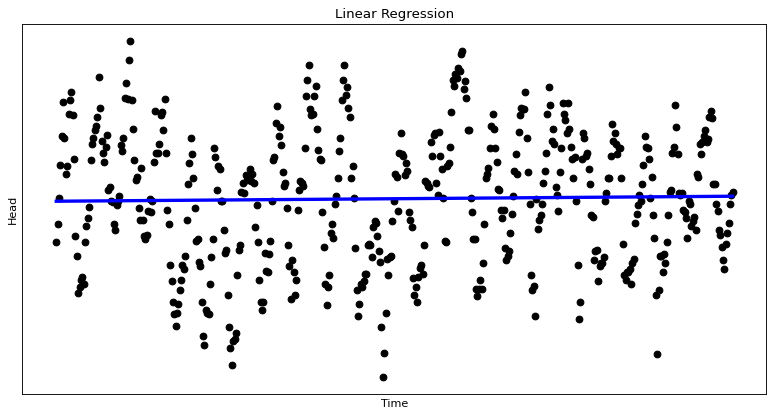

In [15]:
# Plot outputs
plt.figure(figsize=(12,6), dpi=80)
plt.scatter(X_train, Y_train, color="black")
plt.plot(X_train, Y_fit, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.xlabel("Time")
plt.ylabel("Head")
plt.title("Linear Regression")

plt.show()

Well, now that makes sense. We are using 'linear' regression after all, and we have seen the equation: It is literally a straight line. So this was to be expected, and yet, we see ML experts doing amazing things with this method...how?

Linear regression works best when the relationship between your dependant and independant variables are linear. In most instances, this is not the case with hydraulic heads in regards to time (or most real world phenomena). As a result, we need to start considering causal relationships (variables other than time) in forecasting hydraulic head and include them in input data, a process termed 'feature engineering'.

Each additional parameter modifies the original equation (y = mx + c) with additional fitting variables (e.g. y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + ... + b<sub>n</sub>x<sub>n</sub>)

# Feature Engineering

We will now start adding additional features to the model, starting with precipitation.

In [16]:
# Import and inspect the rainfall data
rainfall_dataset = pd.read_csv(r'data\MachineLearning\rain_nb1.csv')
rainfall_dataset.head()

,date,rain
0,1980-01-01,0.0033
1,1980-01-02,0.0025
2,1980-01-03,0.0003
3,1980-01-04,0.0075
4,1980-01-05,0.0080


In [17]:
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13454 non-null  object 
 1   rain    13454 non-null  float64
dtypes: float64(1), object(1)
memory usage: 210.3+ KB


In [18]:
# We noticed that our date field is read in as an object.
# We can modify this column to be a date by using the to_datetime function in pandas.
rainfall_dataset['date'] = pd.to_datetime(rainfall_dataset['date'])
# And check again to see that it is now correct
rainfall_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    13454 non-null  datetime64[ns]
 1   rain    13454 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 210.3 KB


In [19]:
# Inspect the ranges of the data
rainfall_dataset.describe()

,date,rain
count,13454,13454.000000
mean,1998-06-01 12:00:00,0.002089
min,1980-01-01 00:00:00,0.000000
25%,1989-03-17 06:00:00,0.000000
50%,1998-06-01 12:00:00,0.000100
75%,2007-08-16 18:00:00,0.002400
max,2016-10-31 00:00:00,0.072800
std,NaN,0.004241


The observed ranges for datetime are earlier and later than that of our head data, so we will filter the data by using the start time and end time we calculated earlier.

In [20]:
filtered_rainfall = rainfall_dataset[(rainfall_dataset['date'] >= start_time) & (rainfall_dataset['date'] <= end_time)]
filtered_rainfall.describe()

,date,rain
count,10819,10819.000000
mean,2000-09-05 00:00:00,0.002060
min,1985-11-14 00:00:00,0.000000
25%,1993-04-10 12:00:00,0.000000
50%,2000-09-05 00:00:00,0.000100
75%,2008-01-31 12:00:00,0.002400
max,2015-06-28 00:00:00,0.072800
std,NaN,0.004147


And then merge it with our dataset

In [21]:
dataset_with_rainfall = dataset.merge(filtered_rainfall, on='date', how='left')
dataset_with_rainfall.head()

,date,head,time_steps,rain
0,1985-11-14,27.61,0,0.0022
1,1985-11-28,27.73,1,0.0086
2,1985-12-14,27.91,2,0.0037
3,1985-12-28,28.13,3,0.0012
4,1986-01-13,28.32,4,0.0025


We now repeat this process with our second feature: Evaporation

In [22]:
# Import and inspect the evaporation data
evaporation_dataset = pd.read_csv(r'data\MachineLearning\evap_nb1.csv')
evaporation_dataset.head()

,date,evap
0,1980-01-01,0.0002
1,1980-01-02,0.0003
2,1980-01-03,0.0002
3,1980-01-04,0.0001
4,1980-01-05,0.0001


In [23]:
evaporation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13476 entries, 0 to 13475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    13476 non-null  object 
 1   evap    13476 non-null  float64
dtypes: float64(1), object(1)
memory usage: 210.7+ KB


In [24]:
# We noticed that our date field is read in as an object.
# We can modify this column to be a date by using the to_datetime function in pandas.
evaporation_dataset['date'] = pd.to_datetime(evaporation_dataset['date'])
# And check again to see that it is now correct
evaporation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13476 entries, 0 to 13475
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    13476 non-null  datetime64[ns]
 1   evap    13476 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 210.7 KB


In [25]:
# Inspect the ranges of the data
evaporation_dataset.describe()

,date,evap
count,13476,13476.000000
mean,1998-06-12 12:00:00,0.001607
min,1980-01-01 00:00:00,0.000000
25%,1989-03-22 18:00:00,0.000400
50%,1998-06-12 12:00:00,0.001200
75%,2007-09-02 06:00:00,0.002500
max,2016-11-22 00:00:00,0.005800
std,NaN,0.001375


Once again we notice that we need to clip the temporal range of the data. We follow the same process as before:

In [26]:
filtered_evaporation = evaporation_dataset[(evaporation_dataset['date'] >= start_time) & (evaporation_dataset['date'] <= end_time)]
filtered_evaporation.describe()

,date,evap
count,10819,10819.000000
mean,2000-09-05 00:00:00,0.001616
min,1985-11-14 00:00:00,0.000000
25%,1993-04-10 12:00:00,0.000400
50%,2000-09-05 00:00:00,0.001200
75%,2008-01-31 12:00:00,0.002500
max,2015-06-28 00:00:00,0.005800
std,NaN,0.001392


And then merge our evaporation data with our input data:

In [27]:
dataset_complete = dataset_with_rainfall.merge(filtered_evaporation, on='date', how='left')
dataset_complete.head()

,date,head,time_steps,rain,evap
0,1985-11-14,27.61,0,0.0022,0.0005
1,1985-11-28,27.73,1,0.0086,0.0003
2,1985-12-14,27.91,2,0.0037,0.0001
3,1985-12-28,28.13,3,0.0012,0.0002
4,1986-01-13,28.32,4,0.0025,0.0001


We now inspect our final dataset and make sure that there are no missing values. We need to make sure that all values are present for each time step or the algorithm will not run.

In [28]:
dataset_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        644 non-null    datetime64[ns]
 1   head        644 non-null    float64       
 2   time_steps  644 non-null    int64         
 3   rain        644 non-null    float64       
 4   evap        644 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 25.3 KB


In [29]:
dataset_complete.describe()

,date,head,time_steps,rain,evap
count,644,644.000000,644.000000,644.000000,644.000000
mean,2000-09-14 01:13:47.329192704,27.900078,321.500000,0.002375,0.001609
min,1985-11-14 00:00:00,26.710000,0.000000,0.000000,0.000000
25%,1993-01-24 12:00:00,27.557500,160.750000,0.000000,0.000500
50%,2000-05-06 00:00:00,27.920000,321.500000,0.000000,0.001250
75%,2008-07-17 12:00:00,28.230000,482.250000,0.002600,0.002500
max,2015-06-28 00:00:00,28.960000,643.000000,0.072800,0.005600
std,NaN,0.430154,186.051068,0.005436,0.001352


We can plot our new dataset to see what the relationship between our data and our features are

Text(0.5, 1.0, 'Plot of Head vs Rainfall vs Evaporation')

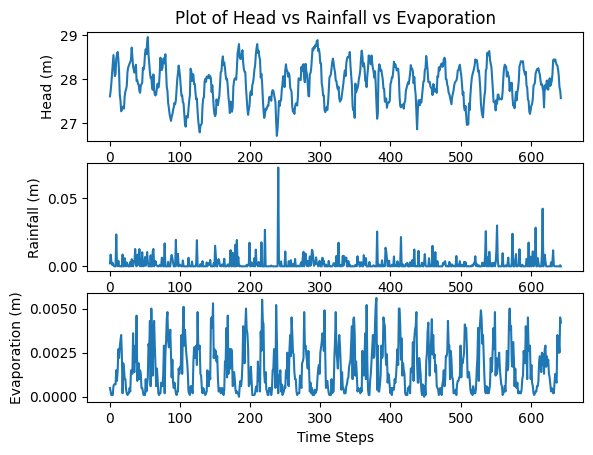

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
ax1.plot(dataset_complete['time_steps'], dataset_complete['head'])
ax1.set_ylabel('Head (m)')
ax1.set_xlabel('Time Steps')

ax2.plot(dataset_complete['time_steps'], dataset_complete['rain'])
ax2.set_ylabel('Rainfall (m)')
ax2.set_xlabel('Time Steps')

ax3.plot(dataset_complete['time_steps'], dataset_complete['evap'])
ax3.set_ylabel('Evaporation (m)')
ax3.set_xlabel('Time Steps')

ax1.set_title('Plot of Head vs Rainfall vs Evaporation')

Now we can extract our data for linear regression. Note that we now extract multiple columns for the X-data

In [31]:
X = dataset_complete.loc[:, ['rain', 'evap']]
Y = dataset_complete.loc[:, 'head']  # create the target
Y, X = Y.align(X, join='inner')  # drop corresponding values in target

And then split the dataset so that we have training and testing data again:

In [32]:
# Split the data into training/testing sets
X_train = X[:-150]
X_test = X[-150:]
# Split the targets into training/testing sets
Y_train = Y[:-150]
Y_test = Y[-150:]

# Normalisation

The goal of scaling is to normalise the input data, such that the mean is equal to zero and the standard deviation is equal to one.
This is done to improve the performance and accuracy of our models, making sure that all features contribute equally to the model.
Otherwise, features with larger magnitude values would dominate the learning process.

In [33]:
# Scale the data
scaler = StandardScaler().fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)
# Verify scaling
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[-1.25855242e-17  2.33731163e-17]
[1. 1.]


We also need to scale our test data, but the test values does not inform normalisation algorithm. The fit is purely achieved with the training data, but we scale the test data to the same normalisation.

In [34]:
X_test_scaled = scaler.transform(X_test.values)
X_test_scaled

array([[ 1.02545157e+00, -1.09419030e+00],
       [-4.36186764e-01, -6.55270276e-01],
       [-3.20794264e-01, -5.08963602e-01],
       [-2.05401764e-01, -5.08963602e-01],
       [-4.36186764e-01, -3.62656928e-01],
       [ 2.94632402e-01, -3.62656928e-01],
       [-4.36186764e-01,  9.54103138e-01],
       [-2.82330098e-01, -3.62656928e-01],
       [-4.36186764e-01,  3.68876442e-01],
       [-2.43865931e-01,  2.22569768e-01],
       [-4.36186764e-01,  4.42029779e-01],
       [ 1.79239902e-01,  6.61489790e-01],
       [-4.36186764e-01,  1.83194318e+00],
       [ 1.60007819e-01,  1.68563651e+00],
       [-4.36186764e-01,  1.68563651e+00],
       [-4.36186764e-01,  8.80949801e-01],
       [-3.78490514e-01, -3.62656928e-01],
       [-4.36186764e-01, -3.62656928e-01],
       [-4.36186764e-01, -1.43196917e-01],
       [-4.36186764e-01, -4.35810265e-01],
       [-4.36186764e-01, -8.74730287e-01],
       [-3.59258431e-01, -1.02103696e+00],
       [-4.36186764e-01, -8.74730287e-01],
       [-2.

Now that our data is ready again, we can proceed to create the model and train it:

In [35]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Get the values that model predicts for the training data
y_fit = pd.Series(model.predict(X_train_scaled), index=X_train.index)

Let's plot the predictions versus the actual water level measurements:

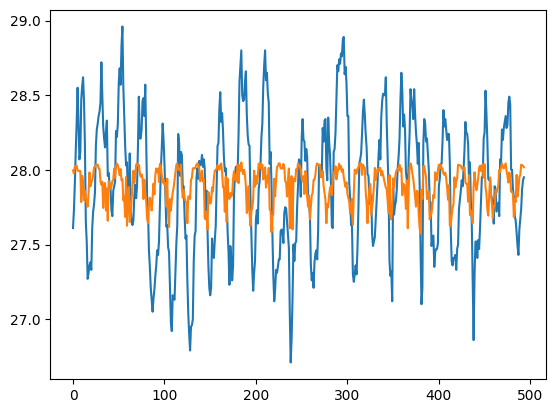

In [36]:
ax = Y_train.plot()
ax = y_fit.plot()

This looks substantially better, but this is still a far cry from a good fit. Now we are going to look at another method commonly employed in fitting linear regression algorithms to non-linear data: We can use a lag component to assist the linear regression algorithm to achieve a better fit.

Lag features are values of a variable from previous time steps that you include as predictors for the current observation. It’s like saying: “What happened before might help explain what’s happening now.”

Many systems, like groundwater heads or streamflow, depend on their own past values. By incorporating lags, you allow the model to "remember" past states. Something that is essential for autocorrelated systems.

Groundwater levels in natural states are not likely to change abruptly, including lags helps reflect the system’s inertia or smoothing. We, as hydrogeologists, also have domain (groundwater) knowledge. This allows us to use our knowledge of delays (e.g., travel time between precipitation and water level response) to engineer lags that best help the model to understand the system.

In this example, we will use the hydraulic head value at the previous time step to assist in predicting the current time step's hydraulic head.

In [37]:
# We can introduce a lag component:
dataset_complete['Lag_1'] = dataset_complete['head'].shift(1)
# And inspect the result
dataset_complete.head()

,date,head,time_steps,rain,evap,Lag_1
0,1985-11-14,27.61,0,0.0022,0.0005,NaN
1,1985-11-28,27.73,1,0.0086,0.0003,27.61
2,1985-12-14,27.91,2,0.0037,0.0001,27.73
3,1985-12-28,28.13,3,0.0012,0.0002,27.91
4,1986-01-13,28.32,4,0.0025,0.0001,28.13


Now that we have added our lag, we can once again extract our columns for training. This time we will use dropna() to get rid of any records with missing values (due to the lag we can expect one missing value in the first row, and a nearly empty row for the last row). We will use the align function to make sure the same records are dropped from our head (target) values.

In [38]:
X = dataset_complete.loc[:, ['rain', 'evap', 'Lag_1']]
X.dropna(inplace=True)  # drop missing values in the feature set
Y = dataset_complete.loc[:, 'head']  # create the target
Y, X = Y.align(X, join='inner')  # drop corresponding values in target

Once again we do the split:

In [39]:
# Split the data into training/testing sets
X_train = X[:-150]
X_test = X[-150:]
# Split the targets into training/testing sets
Y_train = Y[:-150]
Y_test = Y[-150:]

Normalise our training and test data:

In [40]:
# Scale the data
scaler = StandardScaler().fit(X_train.values)
X_train_scaled = scaler.transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)
# Verify scaling
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[ 8.64757893e-17 -4.86426315e-17  1.93849894e-15]
[1. 1. 1.]


And now we can create a model and train it with the new lag componenet added to the data:

In [41]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

y_fit = pd.Series(model.predict(X_train_scaled), index=X_train.index)

This might seem a little strange, why would introducing this lag solve anything? Well, let's look at the relationship between the head value and the newly added lag value

Text(0.5, 1.0, 'Lag Plot of Head')

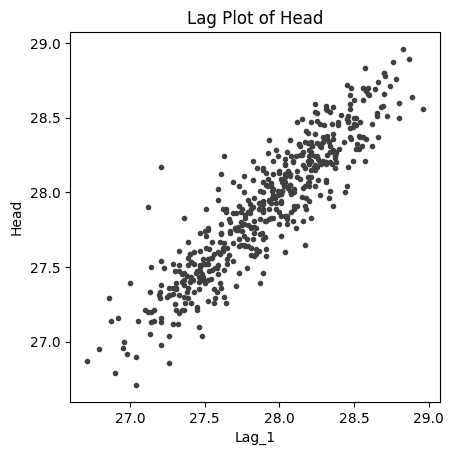

In [42]:
fig, ax = plt.subplots()
ax.plot(X_train['Lag_1'], Y_train, '.', color='0.25')
ax.set_aspect('equal')
ax.set_ylabel('Head')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Head')

We can see that this relationship trends towards linear, and thus provides a relationship that the linear regression will be able to use to learn the behaviour of water level fluctuations. Let's see how to the model did on the training data:

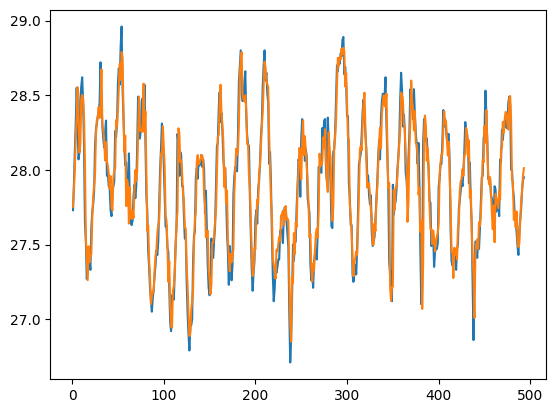

In [43]:
ax = Y_train.plot()
ax = y_fit.plot()

That is a significant change! We wen't from a very poor fit to a substantially better one with the addition of a single feature. But the proof is in the pudding, so let's get dessert with some testing data:

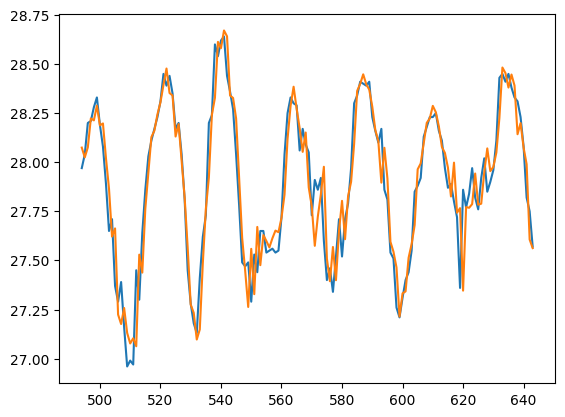

In [44]:
y_pred = pd.Series(model.predict(X_test_scaled), index=X_test.index)
ax = Y_test.plot()
ax = y_pred.plot()

It's not perfect but that is very much passable. Let's take a look at the values that it predicted for us:

In [45]:
# Let's look at the predicted water levels
y_pred

494    28.074631
495    28.024961
496    28.075468
497    28.222824
498    28.213322
         ...    
639    28.199437
640    28.074239
641    27.990215
642    27.606329
643    27.562708
Length: 150, dtype: float64

In [46]:
# And compare it to the actual water levels
Y_test

494    27.97
495    28.04
496    28.20
497    28.21
498    28.28
       ...  
639    28.23
640    28.08
641    27.82
642    27.75
643    27.57
Name: head, Length: 150, dtype: float64

That is close! But what does our metrics say:

In [47]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

Mean squared error: 0.02
Coefficient of determination: 0.87


We interpret these results as follow:
- Low MSE: Our predictions are consistently close to the true values, with very small average errors.
- High R²: 87% of the variation in our dependent variable is being explained by the model inputs.

Quite impressive for a simple linear model with a lagged feature!

These results indicates that the model is not only fitting the data closely but also capturing a solid chunk of the variance.

We will end this discussion here, but as an added bonus I wanted to show you one of the simplest forms of neural networks we can use:

# Multilayer Perceptron

We will be using the same data we did for the previous exercise, including the features we added (Precipitation, Evaporation, Lagged Head). You'll notice straight away the higher complexity of the algorithm when setting up the model:

Iteration 1, loss = 390.14824776
Iteration 2, loss = 387.27308363
Iteration 3, loss = 384.44407481
Iteration 4, loss = 381.65834721
Iteration 5, loss = 378.89129069
Iteration 6, loss = 376.05702252
Iteration 7, loss = 373.05051600
Iteration 8, loss = 369.73319817
Iteration 9, loss = 366.03456154
Iteration 10, loss = 362.01648057
Iteration 11, loss = 357.52320976
Iteration 12, loss = 352.37153695
Iteration 13, loss = 346.58688823
Iteration 14, loss = 340.04945457
Iteration 15, loss = 332.70989508
Iteration 16, loss = 324.44907416
Iteration 17, loss = 315.13923836
Iteration 18, loss = 304.75923489
Iteration 19, loss = 293.36750577
Iteration 20, loss = 280.94613847
Iteration 21, loss = 267.47816440
Iteration 22, loss = 253.06701066
Iteration 23, loss = 237.53636796
Iteration 24, loss = 221.02718299
Iteration 25, loss = 203.61645838
Iteration 26, loss = 185.53312833
Iteration 27, loss = 166.85305892
Iteration 28, loss = 147.88896390
Iteration 29, loss = 128.88888414
Iteration 30, loss = 11

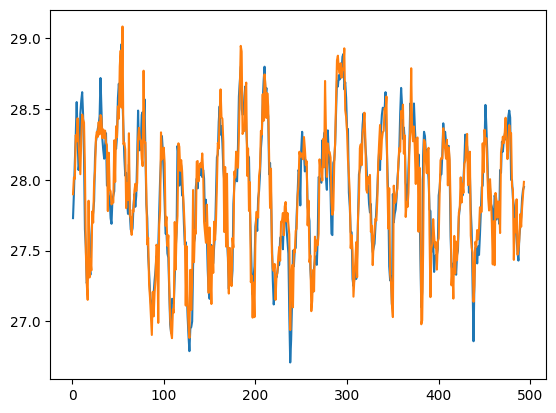

In [57]:
model = MLPRegressor(hidden_layer_sizes=(50, 30, 20), 
                     activation='relu',
                     solver='adam', 
                     learning_rate='adaptive',
                     random_state=42, max_iter=10000, verbose=True)
model.fit(X_train_scaled, Y_train)
y_fit = pd.Series(model.predict(X_train_scaled), index=X_train.index)
ax = Y_train.plot()
ax = y_fit.plot()

This is a fair result, but it is quite worse than our linear regression algorithm. Let's look at its predictive capabilities on unseen data:

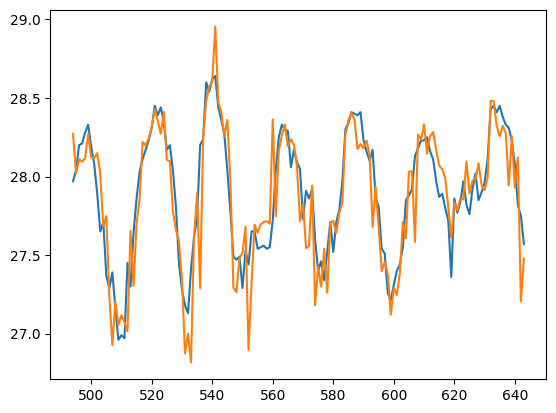

In [58]:
y_pred = pd.Series(model.predict(X_test_scaled), index=X_test.index)
ax = Y_test.plot()
ax = y_pred.plot()

Once again, not bad, but definitely worse. Let's find out exactly how much worse it is with some metrics:

In [59]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

Mean squared error: 0.05
Coefficient of determination: 0.70


It is definitely performing worse, but still doing quite well. With enough tinkering in the design of the MLP algorithm we could get a better fit, but it will require significant testing with different parameters. You might wonder why this is so much more difficult than our linear regression and the answer is simple: complexity.

Neural networks are far more complex than linear regression, but by all rights this is what enables them to do better in non-linear problems. It is a double-edged sword: the model is more powerful, but that same complexity makes it more difficult and laborous to use and get a good fit.

Think of it in terms of groundwater modelling: An analytical modelling method is far simpler to use and requires less data, but it might not be able to express the full complexity of the groundwater system we want to model. In contrast, numerical groundwater modelling is more complex and can better represent real groundwater systems, but the data requirements and the amount of time to get the model set-up and running is also significantly more. This analogy also describer the difference between using linear regression in comparison to neural networks.